In [44]:
import init_notebook

import numpy as np
import matplotlib.pyplot as plt

from src.models.gaussian_process.regression import GaussianProcessRegressor
from src.models.gaussian_process.kernels import RadialBasisFunction, Periodic, ComposeMultiply

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
def plot_fit_example_1(X, y, *, variance=1, length_scale=1, noise_variacne=1, save_name=None):
    # Train GP
    rbf = RadialBasisFunction(variance=variance, length=length_scale)
    gp = GaussianProcessRegressor(rbf, noise_variance=noise_variacne)
    gp.train(X, y)

    # Get plot data
    X_test = np.linspace(0, 20, num=100).reshape(-1, 1)
    predictions, covariances  = gp.get_distribution(X_test)

    # Make prediction figure and plot
    prediction_fig = plt.figure()
    pred_graph = prediction_fig.add_subplot(111)
    pred_graph.set_xlabel('x')
    pred_graph.set_ylabel('y')
    
    # Plot fitted function and variances
    pred_graph.plot(X_test, predictions, color='#ED5050')
    pred_graph.plot(X_test, predictions+(covariances), color='#E3CFCF')
    pred_graph.plot(X_test, predictions-(covariances), color='#E3CFCF')

    # Scatter data points
    pred_graph.scatter(X, y, marker='x')

    # Save figure
    if save_name is not None:
        prediction_fig.savefig(f'task_1/{save_name}.png')

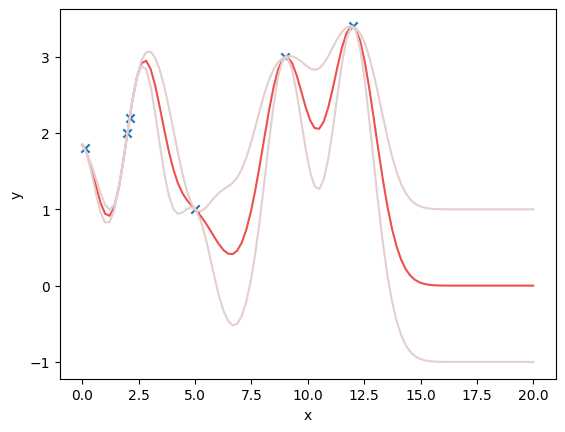

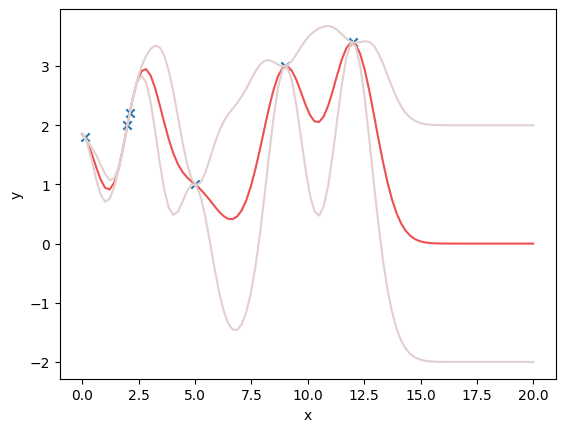

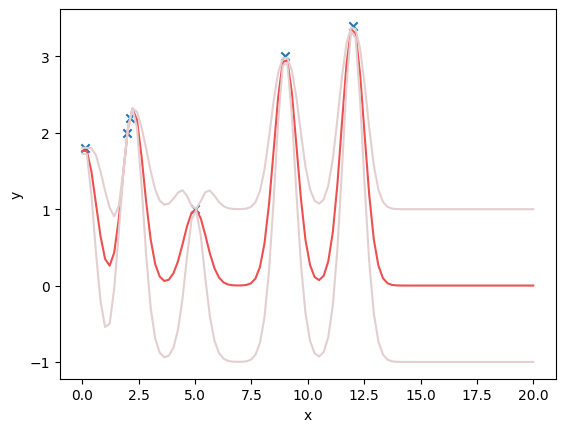

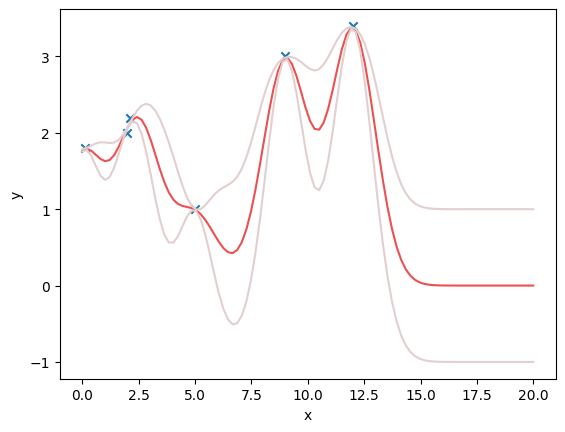

In [46]:
X = np.array([
    [0.1],
    [2],
    [2.1],
    [5],
    [9],
    [12]
])

y = np.array([
    [1.8],
    [2],
    [2.2],
    [1],
    [3],
    [3.4]
])

# (variance, length_scale, noise_variance, save_bool)
configs = [
    (1, 1, 0   , True),
    (2, 1, 0   , True),
    (1, 2, 0   , True),
    (1, 1, 0.007, True)
]

for v, l, n, s in configs:
    if s:
        plot_fit_example_1(X,y, 
            variance=v, 
            length_scale=l,
            noise_variacne=n,
            save_name=f'v={v}-l={l}-n={n}'
        )
    else:
        plot_fit_example_1(X,y, 
            variance=v,
            length_scale=l,
            noise_variacne=n
        )


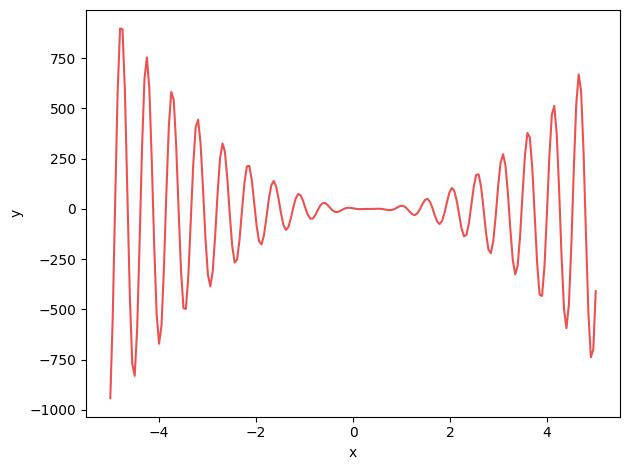

In [47]:
from src.data.data_helpers import forrester_function, load_forrester

X = np.linspace(-5, 5, num=200)
y = forrester_function(X)

forrester_fig = plt.figure()
forrester_plot = forrester_fig.add_subplot(111)
forrester_plot.set_xlabel('x')
forrester_plot.set_ylabel('y')

forrester_plot.plot(X, y, color='#ED5050')

forrester_fig.tight_layout()
forrester_fig.savefig('task_1/forrester.png')

In [48]:
X_train, y_train, X_test, y_test = load_forrester(
    begin=-2.5, end=2.5, noise_variance=0, n_samples=50
)

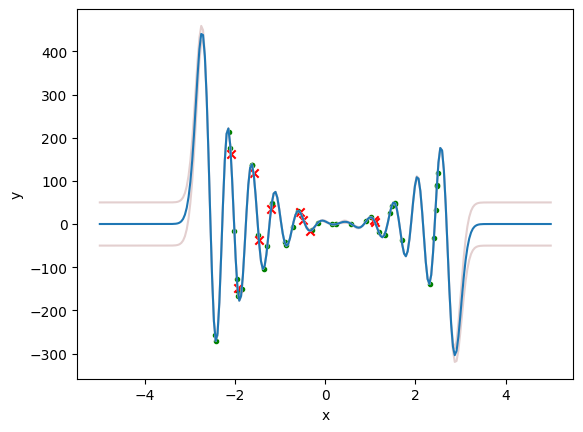

In [49]:
rbf = RadialBasisFunction(variance=50, length=5)
gp = GaussianProcessRegressor(rbf, noise_variance=0)
gp.train(X_train, y_train)

X_plot = np.linspace(-5, 5, num=250).reshape(-1,1)
predictions, covariances  = gp.get_distribution(X_plot)

prediction_fig = plt.figure()
pred_graph = prediction_fig.add_subplot(111)
pred_graph.set_xlabel('x')
pred_graph.set_ylabel('y')

pred_graph.plot(X_plot, predictions+covariances, color='#E3CFCF')
pred_graph.plot(X_plot, predictions-covariances, color='#E3CFCF')
pred_graph.plot(X_plot, predictions)

pred_graph.scatter(X_train, y_train, marker='.', color='green')
pred_graph.scatter(X_test, y_test, marker='x', color='red')
prediction_fig.savefig('task_1/forrester_rbf.png')

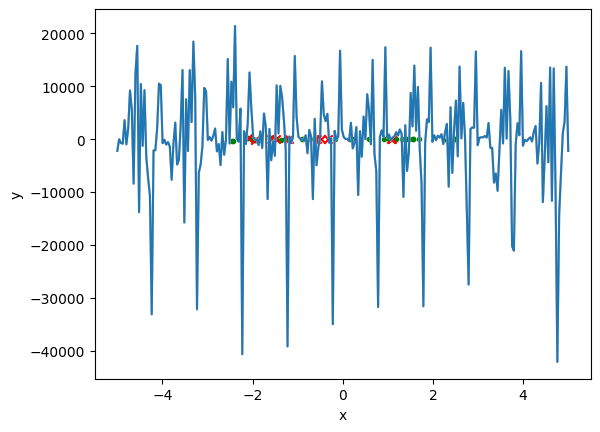

In [50]:

p_kernel = Periodic(variance=0.775, length=0.775, period=1)
gp = GaussianProcessRegressor(p_kernel, noise_variance=0)
gp.train(X_train, y_train)

X_plot = np.linspace(-5, 5, num=250).reshape(-1,1)
predictions, covariances  = gp.get_distribution(X_plot)

prediction_fig = plt.figure()
pred_graph = prediction_fig.add_subplot(111)
pred_graph.set_xlabel('x')
pred_graph.set_ylabel('y')

pred_graph.plot(X_plot, predictions+covariances, color='#E3CFCF')
pred_graph.plot(X_plot, predictions-covariances, color='#E3CFCF')
pred_graph.plot(X_plot, predictions)

pred_graph.scatter(X_train, y_train, marker='.', color='green')
pred_graph.scatter(X_test, y_test, marker='x', color='red')
prediction_fig.savefig('task_1/forrester_periodic.png')

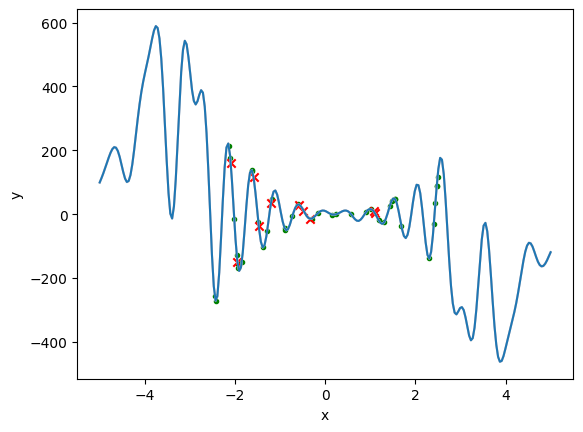

In [51]:
p = Periodic(variance=1, length=3, period=1)
rbf = RadialBasisFunction(variance=1, length=1)
kernel = ComposeMultiply([rbf, p])

gp = GaussianProcessRegressor(kernel=kernel, noise_variance=0)
gp.train(X_train, y_train)

X_plot = np.linspace(-5, 5, num=250).reshape(-1,1)
predictions, covariances  = gp.get_distribution(X_plot)

prediction_fig = plt.figure()
pred_graph = prediction_fig.add_subplot(111)
pred_graph.set_xlabel('x')
pred_graph.set_ylabel('y')

pred_graph.plot(X_plot, predictions+covariances, color='#E3CFCF')
pred_graph.plot(X_plot, predictions-covariances, color='#E3CFCF')
pred_graph.plot(X_plot, predictions)

pred_graph.scatter(X_train, y_train, marker='.', color='green')
pred_graph.scatter(X_test, y_test, marker='x', color='red')
prediction_fig.savefig('task_1/forrester_compose.png')